In [52]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [53]:
bond_buyer = pd.read_csv('PurchaseData.csv')
encash = pd.read_csv('EncashmentData.csv')

In [3]:
bond_buyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Purchaser Name  1316 non-null   object
 1   Denomination    1316 non-null   int64 
 2   Type            1316 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [7]:
encash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date of
 Encashment          20421 non-null  object
 1   Name of the Political Party  20421 non-null  object
 2   Denomination                 20421 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 478.7+ KB


In [13]:
bond_buyer.describe()

,Denomination
count,1.316000e+03
mean,9.236712e+07
std,4.785698e+08
min,1.000000e+03
25%,2.500000e+06
50%,1.250000e+07
75%,5.000000e+07
max,1.208000e+10


In [66]:
encash.describe()

,Denomination
count,2.042100e+04
mean,6.252921e+06
std,4.576321e+06
min,1.000000e+03
25%,1.000000e+06
50%,1.000000e+07
75%,1.000000e+07
max,1.000000e+07


In [67]:
bond_buyer.shape

(1316, 3)

In [11]:
encash.shape

(20421, 3)

In [12]:
bond_buyer.columns

Index(['Purchaser Name', 'Denomination', 'Type'], dtype='object')

In [13]:
encash.columns

Index(['Date of\n Encashment', 'Name of the Political Party', 'Denomination'], dtype='object')

In [69]:
bond_buyer.head()

,Purchaser Name,Denomination,Type
0,PVR LTD,20000000,Firm
1,SK INFRA,400000,Firm
2,KRBL LTD,2000000,Firm
3,GHCL LTD,5000000,Firm
4,SHAHIEXP,30000000,Firm


In [70]:
encash.head()

,Date of\n Encashment,Name of the Political Party,Denomination
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


# 1 Bond Buyer Analysis

**Are there any missing names or information in the data?**

In [7]:
bond_buyer.isnull().sum()

Purchaser Name    0
Denomination      0
Type              0
dtype: int64

******************************************************************************************************

**Total Unique Count of Bond Buyers**

In [71]:
unique_buyer = bond_buyer['Purchaser Name'].unique().tolist()
len(unique_buyer)

1314

In [72]:
unique_buyer

['PVR LTD',
 'SK INFRA',
 'KRBL LTD',
 'GHCL LTD',
 'SHAHIEXP',
 'MSPL LTD',
 'CEAT LTD',
 'G S ISPAT',
 'CIPLA LTD',
 'RICHA & CO',
 'S K TRADERS',
 'CYBER HOMES',
 'GENUS POWER',
 'ITC LIMITED',
 'UPL LIMITED',
 'VEDANTA LTD',
 'NCC LIMITED',
 'CREATIVE LLP',
 'TPK PARTNERS',
 'WPIL LIMITED',
 'PCBL LIMITED',
 'M R F LIMITED',
 'JAY USHIN LTD',
 'SAN LOGISTICS',
 'DR HEALTHTECH',
 'SR DEVELOPERS',
 'NIRMA LIMITED',
 'LUPIN LIMITED',
 'CIPLA LIMITED',
 'MADANLAL LTD.',
 'INDUS ORGANICS',
 'KB DEALERS LLP',
 'KM DEALERS LLP',
 'BM DEALERS LLP',
 'GOA CARBON LTD',
 'SRI DEVELOPERS',
 'J B ENTERPRISE',
 'DIVIT SECURITY',
 'SLRV HOMES LLP',
 'CASTAMET WORKS',
 'C R ASSOCIATES',
 'BIOVET PVT LTD',
 'MICRO LABS LTD',
 'ARVIND LIMITED',
 'PPR M SAND LLP',
 'CYIENT LIMITED',
 'BAJAJ AUTO LTD',
 'HONOUR LAB LTD',
 'SIDDHI TRADING',
 'MS S N MOHANTY',
 'RAJ KAMAL DRUGS',
 'KARTIKEYA INFRA',
 'S K TRADING CO.',
 'K M DEALERS LLP',
 'GANDHI BROTHERS',
 'M/S KAMAL ISPAT',
 'DINESH PROJECTS',
 'AVO

******************************************************************************************************

**What types of buyers are there?**


In [73]:
bond_buyer['Type'].unique().tolist()

['Firm', 'HUF', 'Hospital', 'Iindividual', 'Trust', 'Medical']

******************************************************************************************************

**How many buyers belong to each type?**

In [74]:
bond_buyer['Type'].value_counts().reset_index()

,Type,count
0,Firm,938
1,Iindividual,365
2,HUF,7
3,Hospital,2
4,Trust,2
5,Medical,2


******************************************************************************************************

**What's the most common amount of bonds each type of buyer purchases?**

In [75]:
bond_buyer.groupby('Type')['Denomination'].mean().__round__().reset_index()

,Type,Denomination
0,Firm,123321425.0
1,HUF,3857143.0
2,Hospital,811250000.0
3,Iindividual,10957904.0
4,Medical,110000000.0
5,Trust,5250000.0


******************************************************************************************************

**Are there any buyers who stand out because they buy a lot of bonds?**

In [16]:
bond_buyer.groupby('Purchaser Name')['Denomination'].sum().sort_values(ascending=False).head()

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED    13680000000
MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED        8210000000
QWIKSUPPLYCHAINPRIVATELIMITED                        4100000000
HALDIA ENERGY LIMITED                                3770000000
VEDANTA LIMITED                                      3756500000
Name: Denomination, dtype: int64

In [3]:
bond_buyer

,Purchaser Name,Denomination,Type
0,FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED,12080000000,Firm
1,MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED,8210000000,Firm
2,QWIKSUPPLYCHAINPRIVATELIMITED,4100000000,Firm
3,HALDIA ENERGY LIMITED,3770000000,Firm
4,VEDANTA LIMITED,3756500000,Firm
...,...,...,...
1311,N RAMAMOORTHY,1000,Iindividual
1312,PAWAN AGARWAL,1000,Iindividual
1313,KUNAL GUPTA,1000,Iindividual
1314,DAMINI NATH,1000,Iindividual


******************************************************************************************************

**Which Individual Buys the most bonds?**

In [46]:
top_individuals  = bond_buyer.groupby('Purchaser Name')[['Denomination', 'Type']].sum()

In [47]:
top_individuals [top_individuals ['Type'] == 'Iindividual'].sort_values(by='Denomination' , ascending=False).head()

,Denomination,Type
Purchaser Name,,
LAKSHMI NIWAS MITTAL,350000000,Iindividual
K R RAJA JT,250000000,Iindividual
LAXMIDAS VALLABHDAS ASMITA MERCHA,250000000,Iindividual
RAHUL BHATIA,200000000,Iindividual
M/SKJS AHLUWALIA,140000000,Iindividual


******************************************************************************************************

**What is the number of bonds purchased by each individual, and who bought the most??**

In [4]:
top_individuals  = bond_buyer.groupby('Purchaser Name')[['Denomination']].count()

In [5]:
top_individuals.sort_values(by='Denomination',ascending=False).head()

,Denomination
Purchaser Name,
FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED,3
14 REELS PLUS LLP,1
RAHUL CHOUDHARY,1
RAHUL BHATIA,1
RAHUL AGARWAL,1


******************************************************************************************************

**What is the total number of electoral bonds purchased by individuals or entities whose names contain the substring 'AGARWAL'?**

In [26]:
buyers_name = bond_buyer[bond_buyer['Purchaser Name'].str.contains('AGARWAL')]

In [29]:
buyers_name['Denomination'].sum()

179082000

******************************************************************************************************

# 2 Encashment Data Analysis

**Are there any missing names or information in the data?**

In [31]:
encash.isnull().sum()

Date of\n Encashment           0
Name of the Political Party    0
Denomination                   0
dtype: int64

******************************************************************************************************

**Total Unique Count of Political Party**

In [37]:
total_parties = encash['Name of the Political Party'].unique().tolist()

In [38]:
len(total_parties)

27

In [39]:
total_parties

['ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM',
 'BHARAT RASHTRA SAMITHI',
 'BHARTIYA JANTA PARTY',
 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE',
 'SHIVSENA (POLITICAL PARTY)',
 'TELUGU DESAM PARTY',
 'YSR CONGRESS PARTY (YUVAJANA SRAMIKA R',
 'DMK PARTY IN PARLIAMENT',
 'JANATA DAL ( SECULAR )',
 'NATIONALIST CONGRESS PARTY PARLIAMENT OF',
 'ALL INDIA TRINAMOOL CONGRESS',
 'BIHAR PRADESH JANTA DAL(UNITED)',
 'RASTRIYA JANTA DAL',
 'AAM AADMI PARTY',
 'ADYAKSHA SAMAJVADI PARTY',
 'SHIROMANI AKALI DAL',
 'JHARKHAND MUKTI MORCHA',
 'JAMMU AND KASHMIR NATIONAL CONFERENCE',
 'BIJU JANATA DAL',
 'SHIVSENA',
 'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH',
 'GOA FORWARD PARTY',
 'MAHARASHTRAWADI GOMNTAK PARTY',
 'SIKKIM KRANTIKARI MORCHA',
 'JANASENA PARTY',
 'RASHTRIYA JANTA DAL',
 'SIKKIM DEMOCRATIC FRONT']

******************************************************************************************************

**How to change string into Datetime?**

In [40]:
encash.dtypes

Date of\n Encashment           object
Name of the Political Party    object
Denomination                    int64
dtype: object

In [45]:
encash['Date of\n Encashment'] = pd.to_datetime(encash['Date of\n Encashment'])

In [46]:
encash.dtypes

Date of\n Encashment           datetime64[ns]
Name of the Political Party            object
Denomination                            int64
dtype: object

******************************************************************************************************

**Which political parties got the most donations?**

In [61]:
encash.groupby('Name of the Political Party')['Denomination'].sum().sort_values(ascending=False).head().reset_index()

,Name of the Political Party,Denomination
0,BHARTIYA JANTA PARTY,60605111000
1,ALL INDIA TRINAMOOL CONGRESS,16095314000
2,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",14218655000
3,BHARAT RASHTRA SAMITHI,12147099000
4,BIJU JANATA DAL,7755000000


******************************************************************************************************

**On Which Dates Most Encashment Happens?**

In [78]:
encash.groupby('Date of Encashment')['Denomination'].sum().reset_index().sort_values(by='Denomination',ascending=False).head()

,Date of Encashment,Denomination
17,2019-05-10,4116500000
92,2022-01-10,3724600000
173,2023-07-13,3620000000
106,2022-04-12,3110000000
0,2019-04-12,2951500000


******************************************************************************************************

**Give Political Party Name Who Encash Most On 2019-05-10**

In [91]:
max_encashment = encash.groupby(['Date of Encashment','Name of the Political Party'])['Denomination'].sum().reset_index().sort_values(by='Denomination',ascending=False)
max_encashment[max_encashment['Date of Encashment'].str.contains('2019-05-10')]

,Date of Encashment,Name of the Political Party,Denomination
63,2019-05-10,BHARTIYA JANTA PARTY,3961500000
62,2019-05-10,ADYAKSHA SAMAJVADI PARTY,100000000
64,2019-05-10,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",50000000
65,2019-05-10,SHIROMANI AKALI DAL,5000000


******************************************************************************************************

**Dates Most Encashment Happens visual representation**

In [94]:
date_encash = encash.groupby('Date of Encashment')['Denomination'].sum().reset_index().sort_values(by='Denomination',ascending=False).head()

In [107]:
x = date_encash['Date of Encashment']
y = date_encash['Denomination']/10000000

Text(0.5, 0, '\n Date')

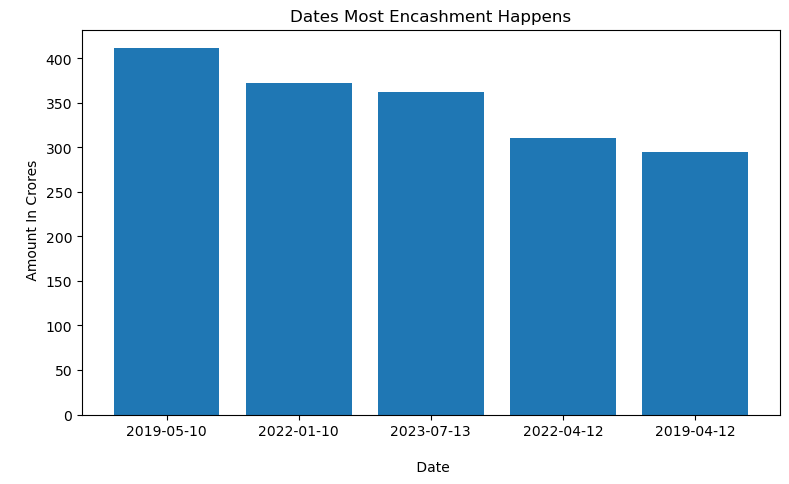

In [114]:
plt.figure(figsize=(9,5))

plt.bar(x,y)
plt.title('Dates Most Encashment Happens')
plt.ylabel('\n Amount In Crores')
plt.xlabel('\n Date')